In [1]:
import pandas as pd

In [2]:
BPTB=pd.read_csv('BPTB.csv')
BPTB.head()

,OEGest_R3,OEGest_Comb,CombinedFMRACE15_30CatValues,MAGER,BMI,PAY_REC,RF_INFT,ILLB_R,NO_INFEC,SEX,CIG_REC,RF_INFT_Dum,CIG_REC_Dum,SEX_DumM1,Pay_1,Pay_2,Pay_3,Pay_4,OEGest_R3DUM
0,2,39,2,26,34.3,4,N,41,1,M,N,0,0,1,0,0,0,1,0
1,2,39,2,23,28.3,1,N,34,1,M,N,0,0,1,1,0,0,0,0
2,2,41,2,29,31.0,1,N,81,1,F,N,0,0,0,1,0,0,0,0
3,2,39,2,29,38.6,2,N,75,1,F,N,0,0,0,0,1,0,0,0
4,2,37,2,33,19.9,4,N,12,1,F,N,0,0,0,0,0,0,1,0


In [3]:
# Gradient boosted machines (GBM)

In [4]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

D:\Anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
BPTBGBM= BPTB.loc[:, ['OEGest_R3DUM','MAGER','BMI','ILLB_R','NO_INFEC','RF_INFT_Dum','CIG_REC_Dum', 'SEX_DumM1','Pay_1','Pay_2','Pay_3','Pay_4'] ] 

In [6]:
X = BPTBGBM.drop('OEGest_R3DUM', axis=1)
y = BPTBGBM['OEGest_R3DUM']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=42)

In [9]:
gbr.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=1, random_state=42)

In [10]:
y_pred = gbr.predict(X_test)

In [11]:
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)

Mean squared error: 0.10526710084150759


In [12]:
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [13]:
# X, y = make_classification(n_samples=1000, n_classes=2, random_state=42)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=42)

In [16]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=1, random_state=42)

In [17]:
y_pred_proba = gbc.predict_proba(X_test)[:,1]

In [18]:
fpr, tpr , thresholds= roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

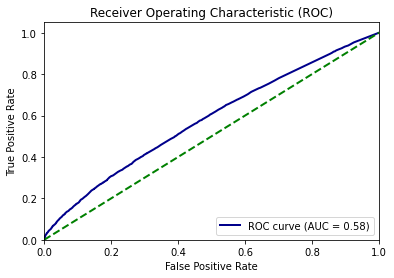

In [19]:
plt.plot(fpr, tpr, color='darkblue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='green', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [20]:
# Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

In [22]:
BPTBRF= BPTB.loc[:, ['OEGest_R3DUM','MAGER','BMI','ILLB_R','NO_INFEC','RF_INFT_Dum','CIG_REC_Dum', 'SEX_DumM1','Pay_1','Pay_2','Pay_3','Pay_4'] ] 

In [23]:
X = BPTBRF.drop('OEGest_R3DUM', axis=1)
y = BPTBRF['OEGest_R3DUM']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [26]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [27]:
y_pred = rf.predict(X_test)

In [28]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.93     56293
           1       0.24      0.06      0.10      7778

    accuracy                           0.86     64071
   macro avg       0.56      0.52      0.51     64071
weighted avg       0.81      0.86      0.83     64071

Confusion Matrix:
 [[54768  1525]
 [ 7286   492]]


In [29]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [30]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [31]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [32]:
y_pred_proba = rfc.predict_proba(X_test)[:, 1]

In [33]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

In [34]:
roc_auc = auc(fpr, tpr)

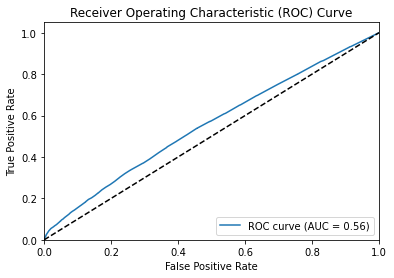

In [35]:
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [36]:
# Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [38]:
X = BPTB.loc[:, ['MAGER','BMI','ILLB_R','NO_INFEC','RF_INFT_Dum','CIG_REC_Dum', 'SEX_DumM1','Pay_1','Pay_2','Pay_3','Pay_4'] ] 
y = BPTB.loc[:, ['OEGest_R3DUM']]

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [40]:
logreg = LogisticRegression()

In [41]:
logreg = LogisticRegression(max_iter=1000)

In [42]:
# logreg = LogisticRegression(max_iter=9000)

In [43]:
logreg.fit(X_train, y_train.to_numpy().ravel())

LogisticRegression(max_iter=1000)

In [44]:
import numpy as np

In [45]:
y_pred = logreg.predict(X_test)

In [46]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94     37561
           1       0.00      0.00      0.00      5153

    accuracy                           0.88     42714
   macro avg       0.44      0.50      0.47     42714
weighted avg       0.77      0.88      0.82     42714

Confusion Matrix:
 [[37561     0]
 [ 5153     0]]


D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
import statsmodels.api as sm

In [48]:
logit_model=sm.Logit(y_train,X_train)

In [49]:
result=logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.369006
         Iterations 6


In [50]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:           OEGest_R3DUM   No. Observations:               170855
Model:                          Logit   Df Residuals:                   170844
Method:                           MLE   Df Model:                           10
Date:                Fri, 05 May 2023   Pseudo R-squ.:                0.005505
Time:                        12:40:34   Log-Likelihood:                -63047.
converged:                       True   LL-Null:                       -63396.
Covariance Type:            nonrobust   LLR p-value:                1.688e-143
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
MAGER           0.0124      0.002      8.154      0.000       0.009       0.015
BMI             0.0066      0.001      6.729      0.000       0.005       0.008
ILLB_R          0.0015      0.000      8.393    

In [51]:
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print(np.exp(conf))

                 2.5%     97.5%        OR
MAGER        1.009440  1.015460  1.012446
BMI          1.004662  1.008511  1.006585
ILLB_R       1.001164  1.001874  1.001519
NO_INFEC     0.856190  0.993421  0.922257
RF_INFT_Dum  2.277918  3.180013  2.691433
CIG_REC_Dum  1.425876  1.614671  1.517340
SEX_DumM1    0.997055  1.056679  1.026434
Pay_1        0.071610  0.090400  0.080458
Pay_2        0.058674  0.075253  0.066448
Pay_3        0.050748  0.068602  0.059004
Pay_4        0.061883  0.082215  0.071328


In [52]:
from sklearn.metrics import roc_curve, auc, confusion_matrix

In [53]:
y_pred_prob = logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

In [54]:
import matplotlib.pyplot as plt

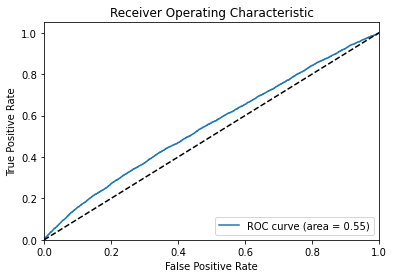

In [55]:
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [56]:
# Check VIF score - Detecting Multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

        feature        VIF
0         MAGER   1.250384
1           BMI   1.015423
2        ILLB_R   1.158969
3      NO_INFEC   1.012590
4   RF_INFT_Dum   1.007936
5   CIG_REC_Dum   1.010922
6     SEX_DumM1   1.000018
7         Pay_1  41.326158
8         Pay_2  22.574027
9         Pay_3   3.071753
10        Pay_4   3.211267
